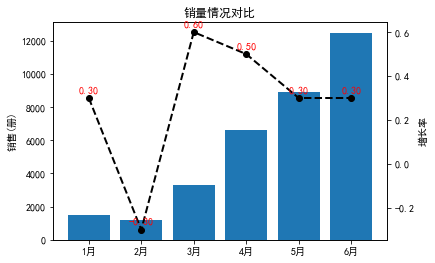

In [20]:
# 双y轴可视化图表
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('mrbook.xlsx')

# x = [str(i)+'月' for i in range(1, 7)]
x = df['月份']
y1 = df['销量']
y2 = df['rate']

# 处理中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']

# 用来正常显示负号
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure()  # 创建画布
ax1 = fig.add_subplot(1, 1, 1)
plt.title('销量情况对比')

# x = [i for i in range(1, 7)]
# plt.xticks(x, [str(i)+'月' for i in range(1, 7)])

ax1.bar(x , y1)

#设置y轴标签
ax1.set_ylabel('销售(册)')

#共享x轴,添加一条y轴坐标
ax2 = ax1.twinx()

ax2.plot(x , y2, color='black' , linestyle='--',marker='o' ,linewidth=2)

ax2.set_ylabel('增长率')

#添加文本
for a,b in zip(x,y2):
    plt.text(a,b+0.02,'%.2f'%b,ha='center',va='bottom',fontsize=10,color='r')

plt.show()

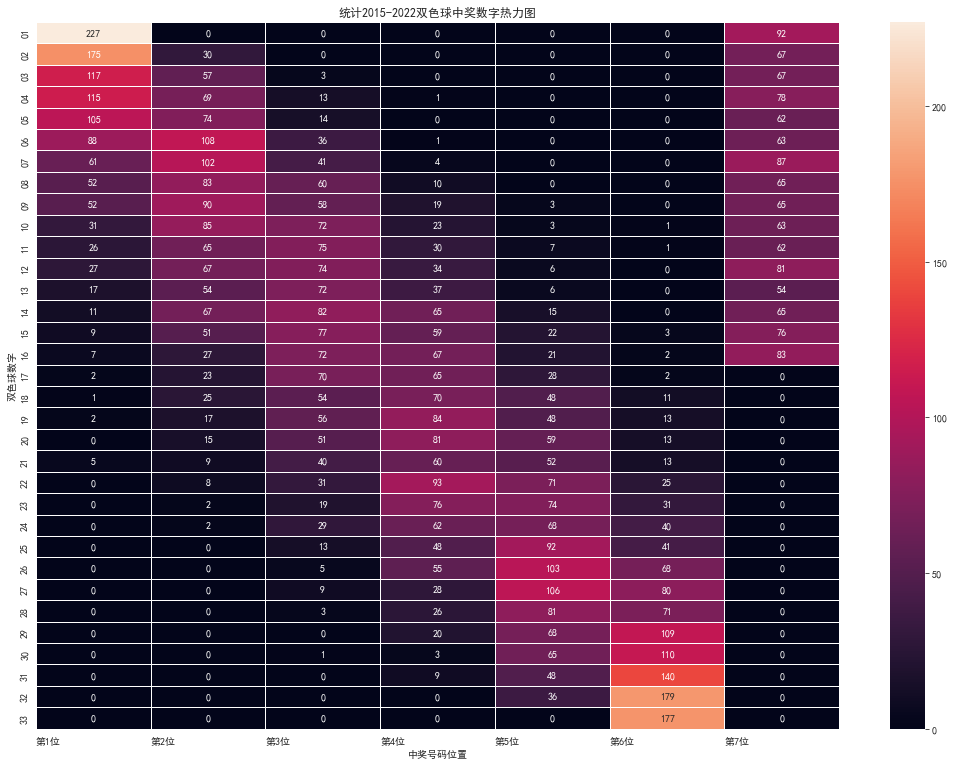

In [3]:
#统计双色球中奖号码热力分布图
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#设置画布背景
sns.set_style('darkgrid')
# 处理中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(18,13))

#读取数据
df = pd.read_excel('双色球.xlsx')
sries = df['开奖号码'].str.split('\s',expand=True)

#对每一位中奖号码统计出现的次数,统计每一列中不同数字出现的次数

df1 = df.groupby(sries[0]).size() #第1个位置
df2 = df.groupby(sries[1]).size() #第2个位置
df3 = df.groupby(sries[2]).size() #第3个位置
df4 = df.groupby(sries[3]).size() #第4个位置
df5 = df.groupby(sries[4]).size() #第5个位置
df6 = df.groupby(sries[5]).size() #第6个位置
df7 = df.groupby(sries[6]).size() #第7个位置

#横向合并
data = pd.concat([df1,df2,df3,df4,df5,df6,df7] , axis=1 , sort=True)
#空值处理, 将NaN替换成0
data=data.fillna(0)
#浮点数转化成整数显示
data = data.round(0).astype(int)

#绘制热力图
plt.title('统计2015-2022双色球中奖数字热力图')

sns.heatmap(data,annot=True,fmt='d',lw=0.5)

plt.xlabel('中奖号码位置')
plt.ylabel('双色球数字')

plt.xticks(range(0,7),['第'+str(i)+'位' for i in range(1,8)],ha='left')
plt.show()